Extract Iris Dataset from Colab using API token

In [4]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bassanttarek","key":"343631da8363d85eb9d6f2a3cbf2650b"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [6]:
!chmod 600 ~/.kaggle/kaggle.json


In [7]:
!kaggle datasets download -d saurabh00007/iriscsv


Dataset URL: https://www.kaggle.com/datasets/saurabh00007/iriscsv
License(s): CC0-1.0
  0% 0.00/1.28k [00:00<?, ?B/s]
100% 1.28k/1.28k [00:00<00:00, 3.93MB/s]


In [8]:
!unzip iriscsv.zip


Archive:  iriscsv.zip
  inflating: Iris.csv                


**Start Our project ** [Load and Use the dataset]

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [10]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Check for Missing Values**

In [56]:
print("Missing values in the dataset:")
print(df.isnull().sum())

Missing values in the dataset:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [11]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Data Visualization

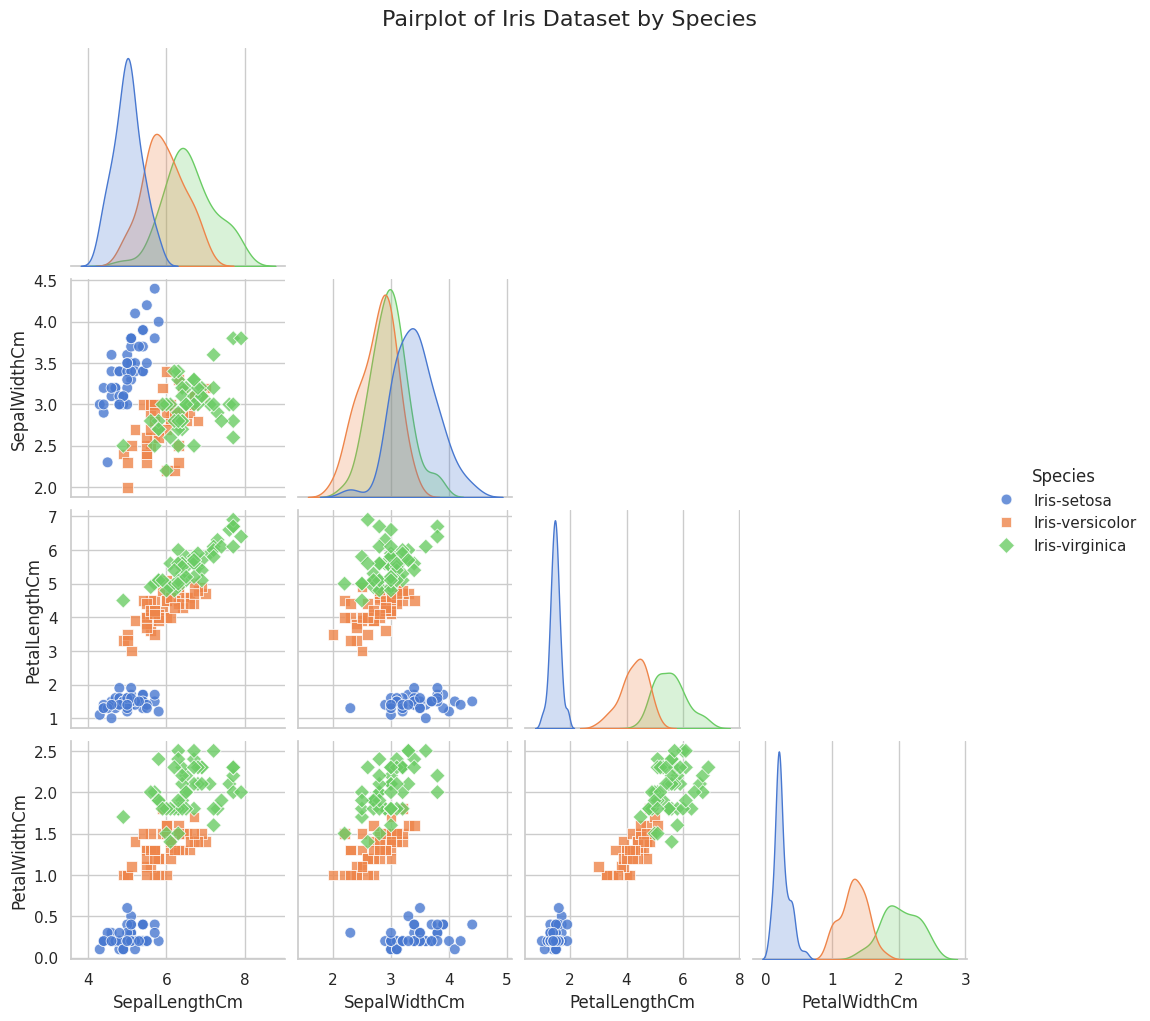

In [12]:
sns.set(style="whitegrid", palette="muted")
sns.pairplot(df.drop('Id', axis=1),
             hue='Species',
             corner=True,
             diag_kind='kde',
             markers=["o", "s", "D"],
             height=2.5,
             plot_kws={'alpha': 0.8, 's': 60})

plt.suptitle('Pairplot of Iris Dataset by Species', y=1.02, fontsize=16)
plt.show()

**Split the dataset**

In [14]:
X = df.drop(['Id', 'Species'], axis=1)
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}')


Training set shape: (120, 4), Testing set shape: (30, 4)


**Logistics Regression Model**

In [18]:
logistic_regression = LogisticRegression(max_iter=200)
logistic_regression.fit(X_train, y_train)
y_pred_logistic = logistic_regression.predict(X_test)


In [22]:
# EValuation
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic, average='weighted')
recall_logistic = recall_score(y_test, y_pred_logistic, average='weighted')
f1_logistic = f1_score(y_test, y_pred_logistic, average='weighted')
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)

print(f'--- Logistic Regression ---')
print(f'Accuracy: {accuracy_logistic:.4f}')
print(f'Precision: {precision_logistic:.4f}')
print(f'Recall: {recall_logistic:.4f}')
print(f'F1 Score: {f1_logistic:.4f}')
print(f'Confusion Matrix:\n{conf_matrix_logistic}\n')

--- Logistic Regression ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]



**K-Nearest Neighbors (KNN)**

In [23]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [24]:

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Print metrics
print(f'--- K-Nearest Neighbors ---')
print(f'Accuracy: {accuracy_knn:.4f}')
print(f'Precision: {precision_knn:.4f}')
print(f'Recall: {recall_knn:.4f}')
print(f'F1 Score: {f1_knn:.4f}')
print(f'Confusion Matrix:\n{conf_matrix_knn}\n')

--- K-Nearest Neighbors ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]



**Gaussian Naive Bayes**

In [25]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)
y_pred_gaussian_nb = gaussian_nb.predict(X_test)

In [26]:
accuracy_gaussian_nb = accuracy_score(y_test, y_pred_gaussian_nb)
precision_gaussian_nb = precision_score(y_test, y_pred_gaussian_nb, average='weighted')
recall_gaussian_nb = recall_score(y_test, y_pred_gaussian_nb, average='weighted')
f1_gaussian_nb = f1_score(y_test, y_pred_gaussian_nb, average='weighted')
conf_matrix_gaussian_nb = confusion_matrix(y_test, y_pred_gaussian_nb)

# Print metrics
print(f'--- Gaussian Naive Bayes ---')
print(f'Accuracy: {accuracy_gaussian_nb:.4f}')
print(f'Precision: {precision_gaussian_nb:.4f}')
print(f'Recall: {recall_gaussian_nb:.4f}')
print(f'F1 Score: {f1_gaussian_nb:.4f}')
print(f'Confusion Matrix:\n{conf_matrix_gaussian_nb}\n')

--- Gaussian Naive Bayes ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]



**Bernoulli Naive Bayes**

In [27]:
bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(X_train, y_train)
y_pred_bernoulli_nb = bernoulli_nb.predict(X_test)

In [28]:
accuracy_bernoulli_nb = accuracy_score(y_test, y_pred_bernoulli_nb)
precision_bernoulli_nb = precision_score(y_test, y_pred_bernoulli_nb, average='weighted')
recall_bernoulli_nb = recall_score(y_test, y_pred_bernoulli_nb, average='weighted')
f1_bernoulli_nb = f1_score(y_test, y_pred_bernoulli_nb, average='weighted')
conf_matrix_bernoulli_nb = confusion_matrix(y_test, y_pred_bernoulli_nb)

# Print metrics
print(f'--- Bernoulli Naive Bayes ---')
print(f'Accuracy: {accuracy_bernoulli_nb:.4f}')
print(f'Precision: {precision_bernoulli_nb:.4f}')
print(f'Recall: {recall_bernoulli_nb:.4f}')
print(f'F1 Score: {f1_bernoulli_nb:.4f}')
print(f'Confusion Matrix:\n{conf_matrix_bernoulli_nb}\n')

--- Bernoulli Naive Bayes ---
Accuracy: 0.3000
Precision: 0.0900
Recall: 0.3000
F1 Score: 0.1385
Confusion Matrix:
[[ 0 10  0]
 [ 0  9  0]
 [ 0 11  0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Multinomial Naive Bayes**

In [29]:
multinomial_nb = MultinomialNB()
multinomial_nb.fit(X_train, y_train)
y_pred_multinomial_nb = multinomial_nb.predict(X_test)

In [30]:
accuracy_multinomial_nb = accuracy_score(y_test, y_pred_multinomial_nb)
precision_multinomial_nb = precision_score(y_test, y_pred_multinomial_nb, average='weighted')
recall_multinomial_nb = recall_score(y_test, y_pred_multinomial_nb, average='weighted')
f1_multinomial_nb = f1_score(y_test, y_pred_multinomial_nb, average='weighted')
conf_matrix_multinomial_nb = confusion_matrix(y_test, y_pred_multinomial_nb)

# Print metrics
print(f'--- Multinomial Naive Bayes ---')
print(f'Accuracy: {accuracy_multinomial_nb:.4f}')
print(f'Precision: {precision_multinomial_nb:.4f}')
print(f'Recall: {recall_multinomial_nb:.4f}')
print(f'F1 Score: {f1_multinomial_nb:.4f}')
print(f'Confusion Matrix:\n{conf_matrix_multinomial_nb}\n')

--- Multinomial Naive Bayes ---
Accuracy: 0.9000
Precision: 0.9250
Recall: 0.9000
F1 Score: 0.8992
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  3  8]]



**decision_tree**

In [31]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)

In [32]:
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
precision_decision_tree = precision_score(y_test, y_pred_decision_tree, average='weighted')
recall_decision_tree = recall_score(y_test, y_pred_decision_tree, average='weighted')
f1_decision_tree = f1_score(y_test, y_pred_decision_tree, average='weighted')
conf_matrix_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)

# Print metrics
print(f'--- Decision Tree ---')
print(f'Accuracy: {accuracy_decision_tree:.4f}')
print(f'Precision: {precision_decision_tree:.4f}')
print(f'Recall: {recall_decision_tree:.4f}')
print(f'F1 Score: {f1_decision_tree:.4f}')
print(f'Confusion Matrix:\n{conf_matrix_decision_tree}\n')

--- Decision Tree ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]



**Random Forest**

In [33]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)

In [34]:
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
precision_random_forest = precision_score(y_test, y_pred_random_forest, average='weighted')
recall_random_forest = recall_score(y_test, y_pred_random_forest, average='weighted')
f1_random_forest = f1_score(y_test, y_pred_random_forest, average='weighted')
conf_matrix_random_forest = confusion_matrix(y_test, y_pred_random_forest)

# Print metrics
print(f'--- Random Forest ---')
print(f'Accuracy: {accuracy_random_forest:.4f}')
print(f'Precision: {precision_random_forest:.4f}')
print(f'Recall: {recall_random_forest:.4f}')
print(f'F1 Score: {f1_random_forest:.4f}')
print(f'Confusion Matrix:\n{conf_matrix_random_forest}\n')

--- Random Forest ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]



**XGBoost**

In [42]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [44]:
xgb = XGBClassifier(eval_metric='mlogloss')
xgb.fit(X_train, y_train_encoded)
y_pred_xgb = xgb.predict(X_test)
y_pred_xgb_labels = label_encoder.inverse_transform(y_pred_xgb)


In [45]:
accuracy_xgb = accuracy_score(y_test_encoded, y_pred_xgb)
precision_xgb = precision_score(y_test_encoded, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test_encoded, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test_encoded, y_pred_xgb, average='weighted')
conf_matrix_xgb = confusion_matrix(y_test_encoded, y_pred_xgb)

# Print metrics
print(f'--- XGBoost ---')
print(f'Accuracy: {accuracy_xgb:.4f}')
print(f'Precision: {precision_xgb:.4f}')
print(f'Recall: {recall_xgb:.4f}')
print(f'F1 Score: {f1_xgb:.4f}')
print(f'Confusion Matrix:\n{conf_matrix_xgb}\n')

--- XGBoost ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]



**Support Vector Machine**

In [46]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [47]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Print metrics
print(f'--- Support Vector Machine ---')
print(f'Accuracy: {accuracy_svm:.4f}')
print(f'Precision: {precision_svm:.4f}')
print(f'Recall: {recall_svm:.4f}')
print(f'F1 Score: {f1_svm:.4f}')
print(f'Confusion Matrix:\n{conf_matrix_svm}\n')

--- Support Vector Machine ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]



**Comparison Part**

In [49]:
import pandas as pd

# Define the comparison results
comparison_results = {
    'Model': ['Logistic Regression', 'K-Nearest Neighbors', 'Gaussian Naive Bayes', 'Bernoulli Naive Bayes',
              'Multinomial Naive Bayes', 'Decision Tree', 'Random Forest', 'XGBoost', 'SVM'],
    'Accuracy': [accuracy_logistic, accuracy_knn, accuracy_gaussian_nb, accuracy_bernoulli_nb, accuracy_multinomial_nb,
                 accuracy_decision_tree, accuracy_random_forest, accuracy_xgb, accuracy_svm],
    'Precision': [precision_logistic, precision_knn, precision_gaussian_nb, precision_bernoulli_nb, precision_multinomial_nb,
                  precision_decision_tree, precision_random_forest, precision_xgb, precision_svm],
    'Recall': [recall_logistic, recall_knn, recall_gaussian_nb, recall_bernoulli_nb, recall_multinomial_nb,
               recall_decision_tree, recall_random_forest, recall_xgb, recall_svm],
    'F1 Score': [f1_logistic, f1_knn, f1_gaussian_nb, f1_bernoulli_nb, f1_multinomial_nb,
                 f1_decision_tree, f1_random_forest, f1_xgb, f1_svm]
}

# Convert results to a DataFrame for easy comparison
comparison_df = pd.DataFrame(comparison_results)

comparison_df



,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,1.0,1.000,1.0,1.000000
1,K-Nearest Neighbors,1.0,1.000,1.0,1.000000
2,Gaussian Naive Bayes,1.0,1.000,1.0,1.000000
3,Bernoulli Naive Bayes,0.3,0.090,0.3,0.138462
4,Multinomial Naive Bayes,0.9,0.925,0.9,0.899248
5,Decision Tree,1.0,1.000,1.0,1.000000
6,Random Forest,1.0,1.000,1.0,1.000000
7,XGBoost,1.0,1.000,1.0,1.000000
8,SVM,1.0,1.000,1.0,1.000000


**Bar Plot for Model Metrics**

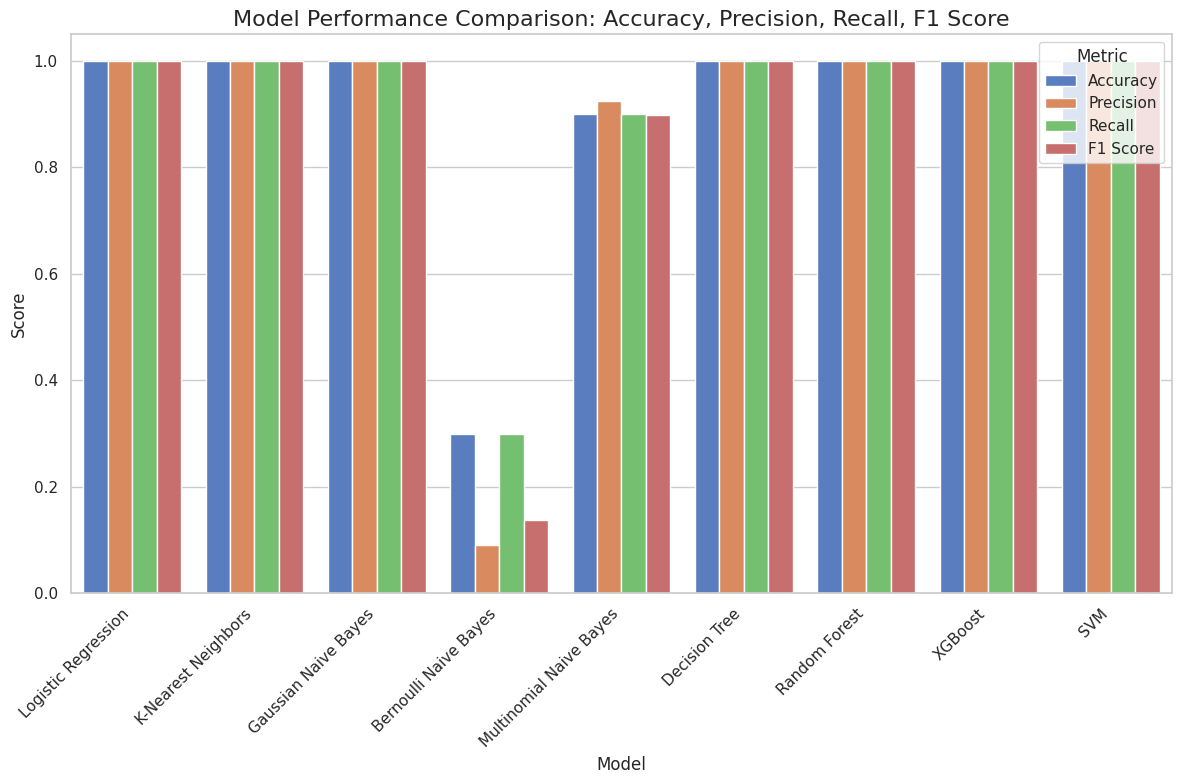

In [50]:
comparison_melted = comparison_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Plot the comparison using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Score', hue='Metric', data=comparison_melted)
plt.xticks(rotation=45, ha='right')
plt.title("Model Performance Comparison: Accuracy, Precision, Recall, F1 Score", fontsize=16)
plt.tight_layout()
plt.show()


**Line Plot for Each Metric Across Models**

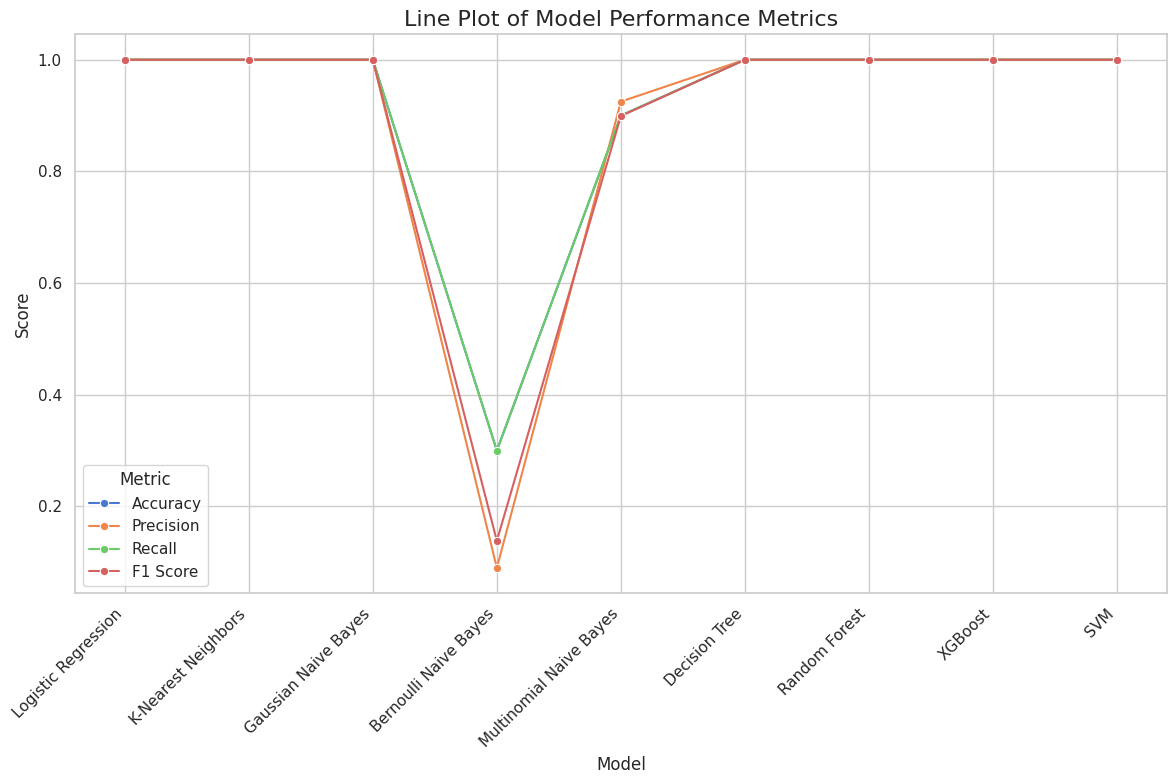

In [51]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='Model', y='Score', hue='Metric', data=comparison_melted, marker="o")
plt.xticks(rotation=45, ha='right')
plt.title("Line Plot of Model Performance Metrics", fontsize=16)
plt.tight_layout()
plt.show()

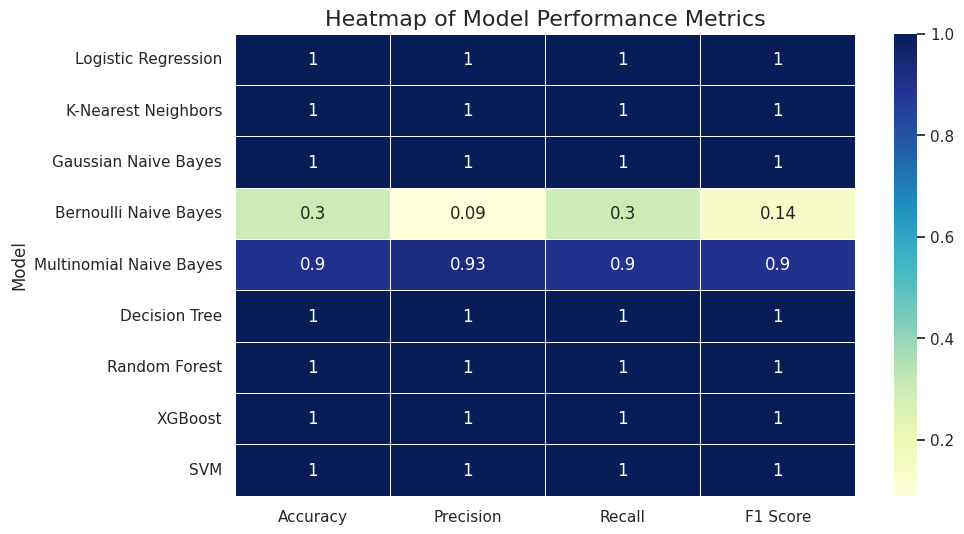

In [52]:
comparison_df.set_index('Model', inplace=True)

# Plot a heatmap for model performance
plt.figure(figsize=(10, 6))
sns.heatmap(comparison_df, annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title("Heatmap of Model Performance Metrics", fontsize=16)
plt.show()

In [55]:
# Identify the best performing models for each metric
best_models = comparison_df.idxmax()

print("Best Models for Each Metric:")
print(best_models)


Best Models for Each Metric:
Accuracy     Logistic Regression
Precision    Logistic Regression
Recall       Logistic Regression
F1 Score     Logistic Regression
dtype: object
